In [ ]:
!pip install pandas numpy matplotlib seaborn nltk spacy scikit-learn wordcloud


^C


  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.8 MB 20.8 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/11.8 MB 8.4 MB/s eta 0:00:02
   ----------- ---------------------------- 3.4/11.8 MB 5.3 MB/s eta 0:00:02
   ---------------- ----------------------- 4.7/11.8 MB 7.0 MB/s eta 0:00:02
   ------

In [2]:
import pandas as pd


In [4]:
df = pd.read_csv("airlines_reviews.csv")
df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [9]:
df['Reviews'].head()


,Reviews
0,Flight was amazing. The crew onboard this fl...
1,Booking an emergency exit seat still meant h...
2,Excellent performance on all fronts. I would...
3,Pretty comfortable flight considering I was f...
4,The service was consistently good from start ...


In [6]:
# Check for missing values
print(df.isnull().sum())


Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
dtype: int64


In [10]:
import nltk
nltk.download('punkt')        # Tokenizer data
nltk.download('stopwords')    # Stopwords data
nltk.download('wordnet')      # Useful for lemmatization if needed
nltk.download('omw-1.4')      # Lexical data for WordNet


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [13]:
nltk.download('punkt', force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
import nltk

# Delete and redownload punkt data
nltk.data.path = ['/root/nltk_data', '/usr/local/share/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data']  # Specify common paths
nltk.download('punkt', force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
import nltk
# Download both punkt and punkt_tab
nltk.download('punkt_tab')
nltk.download('punkt')

# Let's also verify the download location and contents
import os
print(f"NLTK Data Path: {nltk.data.path}")

from nltk.tokenize import word_tokenize

text = "This is a test sentence."
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...


NLTK Data Path: ['/root/nltk_data', '/usr/local/share/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data']
['This', 'is', 'a', 'test', 'sentence', '.']


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords if not already done
import nltk
# Download both punkt and punkt_tab
nltk.download('punkt_tab')
nltk.download('punkt')

# Ensure punkt and other resources are downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Join words back into a single string
    return ' '.join(words)

# Apply preprocessing to the Reviews column
df['Cleaned_Reviews'] = df['Reviews'].apply(preprocess_text)

# Display the first few rows to confirm preprocessing
print(df[['Reviews', 'Cleaned_Reviews']].head()) #this is the script that you provided

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             Reviews  \
0    Flight was amazing. The crew onboard this fl...   
1    Booking an emergency exit seat still meant h...   
2    Excellent performance on all fronts. I would...   
3   Pretty comfortable flight considering I was f...   
4   The service was consistently good from start ...   

                                     Cleaned_Reviews  
0  flight amazing crew onboard flight welcoming g...  
1  booking emergency exit seat still meant huge d...  
2  excellent performance fronts would definitely ...  
3  pretty comfortable flight considering flying e...  
4  service consistently good start finish cabin c...  


In [22]:
df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Cleaned_Reviews
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,flight amazing crew onboard flight welcoming g...
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,booking emergency exit seat still meant huge d...
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,excellent performance fronts would definitely ...
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,pretty comfortable flight considering flying e...
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,service consistently good start finish cabin c...


In [23]:
df['Cleaned_Reviews'][0]

'flight amazing crew onboard flight welcoming gave good atmosphere crew serving aisle goes initial g kind helpful gave mom bday cake late celebration even though hr min flight seat well sanitized legroom spacious ife onboard many variety shows music etc bathroom always kept clean crew times food delicious overall flight'

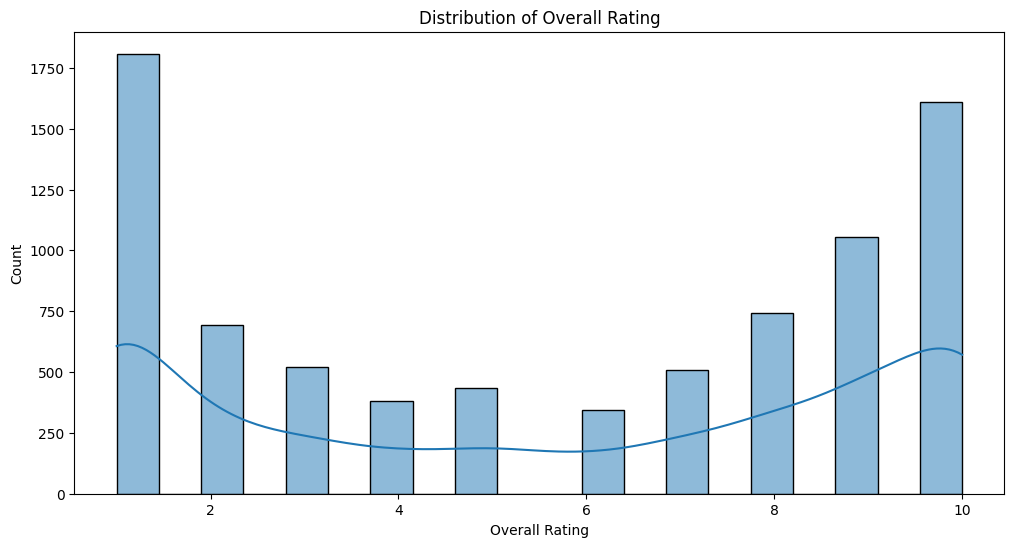

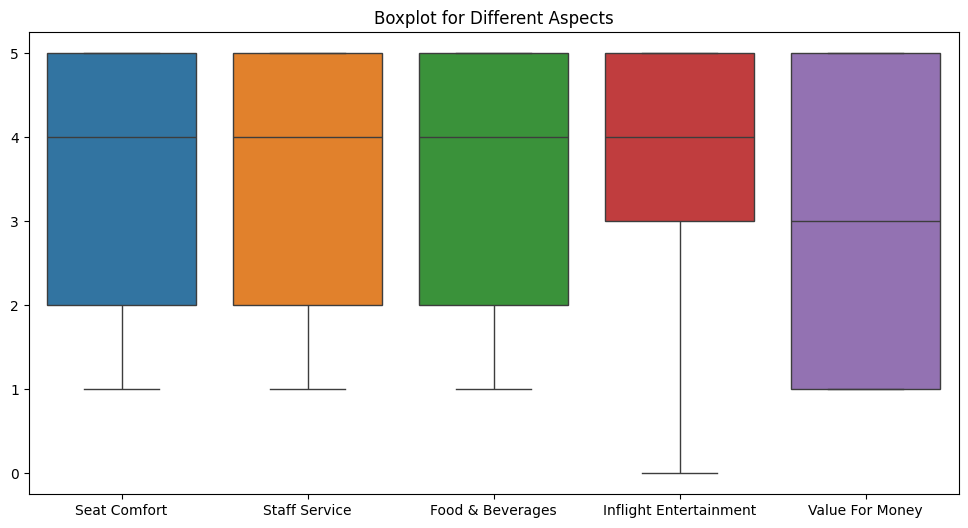

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Overall Rating
plt.figure(figsize=(12, 6))
sns.histplot(df['Overall Rating'], kde=True, bins=20)
plt.title('Distribution of Overall Rating')
plt.show()

# Plot a boxplot for each aspect (Seat Comfort, Staff Service, etc.)
features = ['Seat Comfort', 'Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Value For Money']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features])
plt.title('Boxplot for Different Aspects')
plt.show()


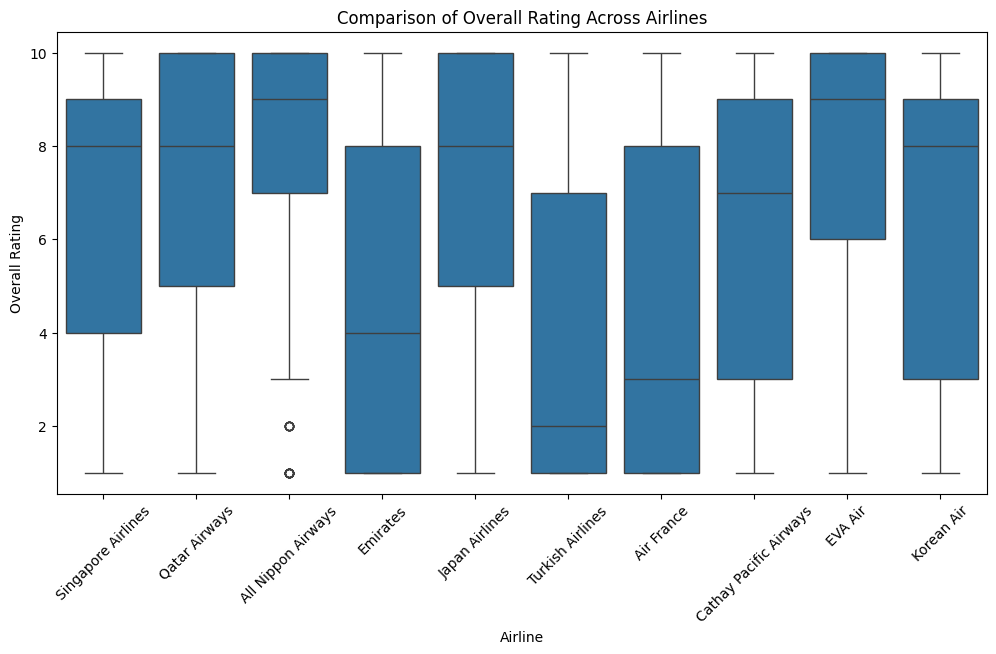

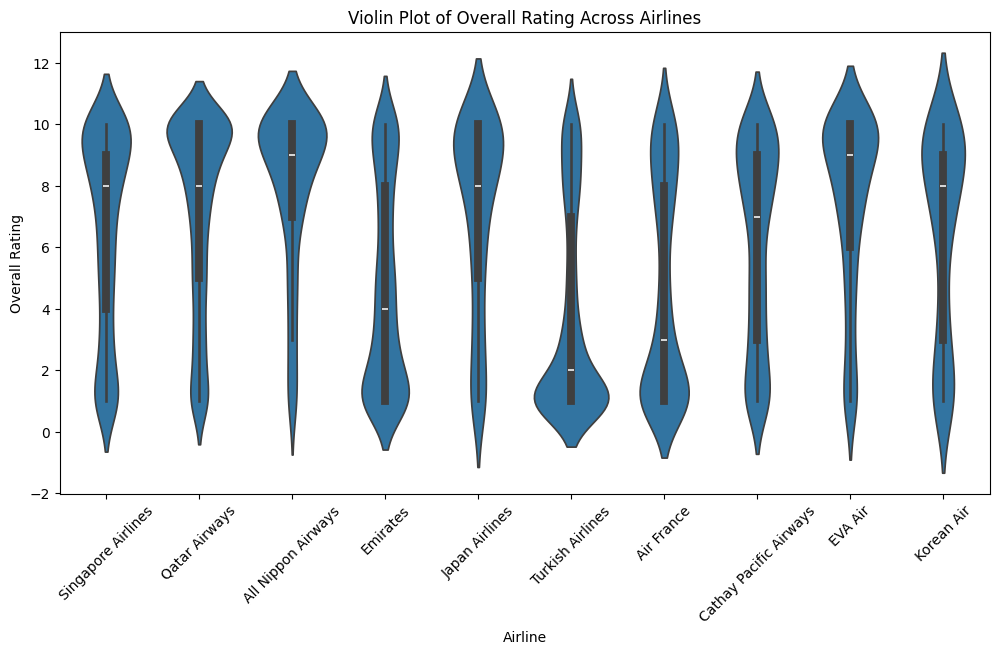

In [27]:
# Distribution of Overall Rating across different airlines
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Overall Rating', data=df)
plt.title('Comparison of Overall Rating Across Airlines')
plt.xticks(rotation=45)  # Rotate airline names if needed
plt.show()

# Alternatively, you can use a violin plot to show the distribution
plt.figure(figsize=(12, 6))
sns.violinplot(x='Airline', y='Overall Rating', data=df)
plt.title('Violin Plot of Overall Rating Across Airlines')
plt.xticks(rotation=45)
plt.show()

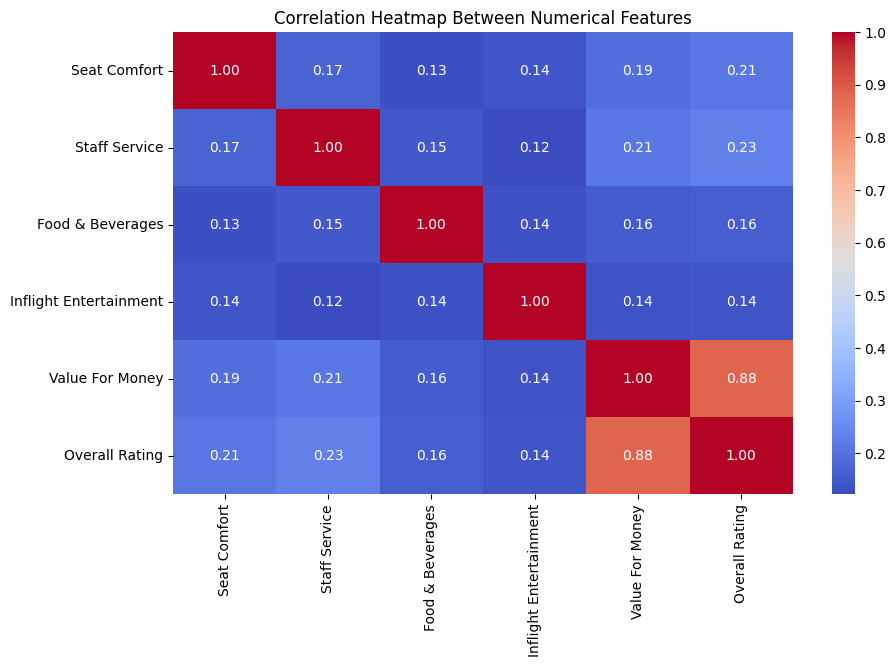

In [28]:
correlation_matrix = df[['Seat Comfort', 'Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Value For Money', 'Overall Rating']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Between Numerical Features')
plt.show()


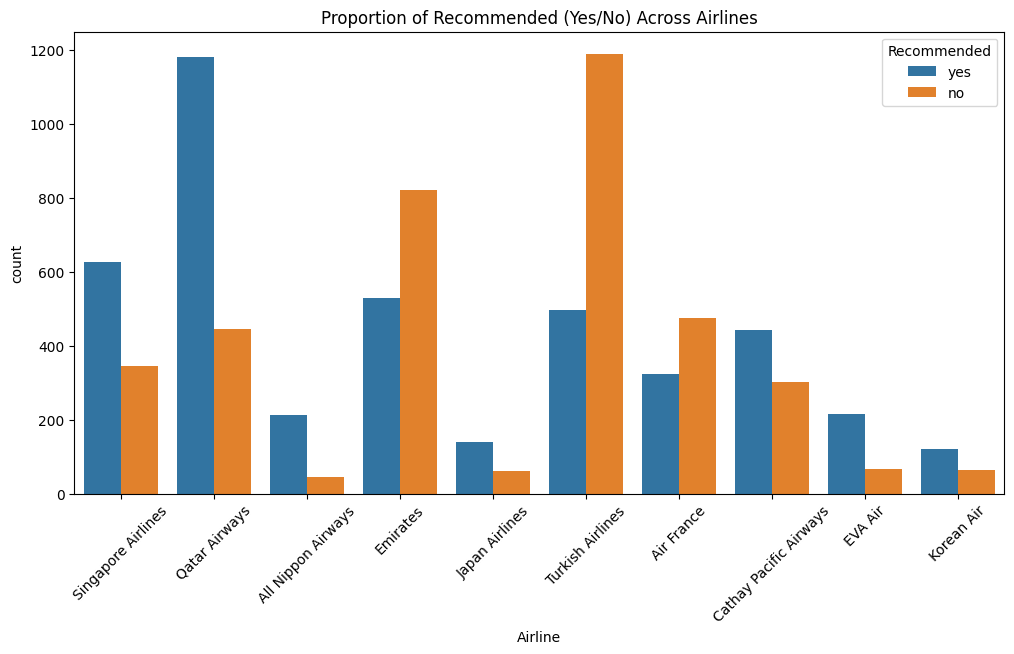

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Airline', hue='Recommended', data=df)
plt.title('Proportion of Recommended (Yes/No) Across Airlines')
plt.xticks(rotation=45)
plt.show()


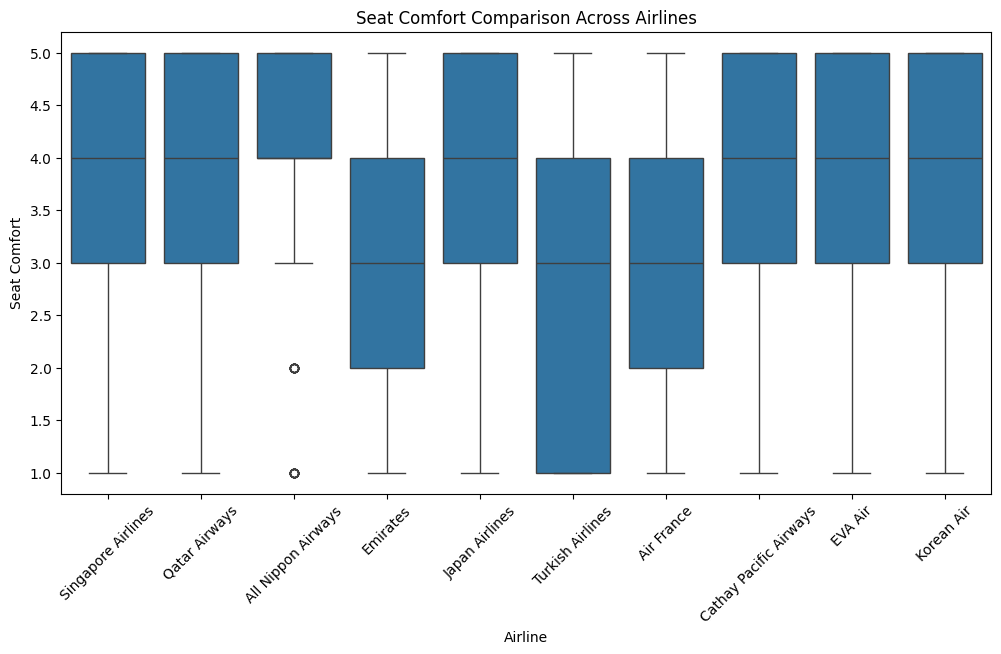

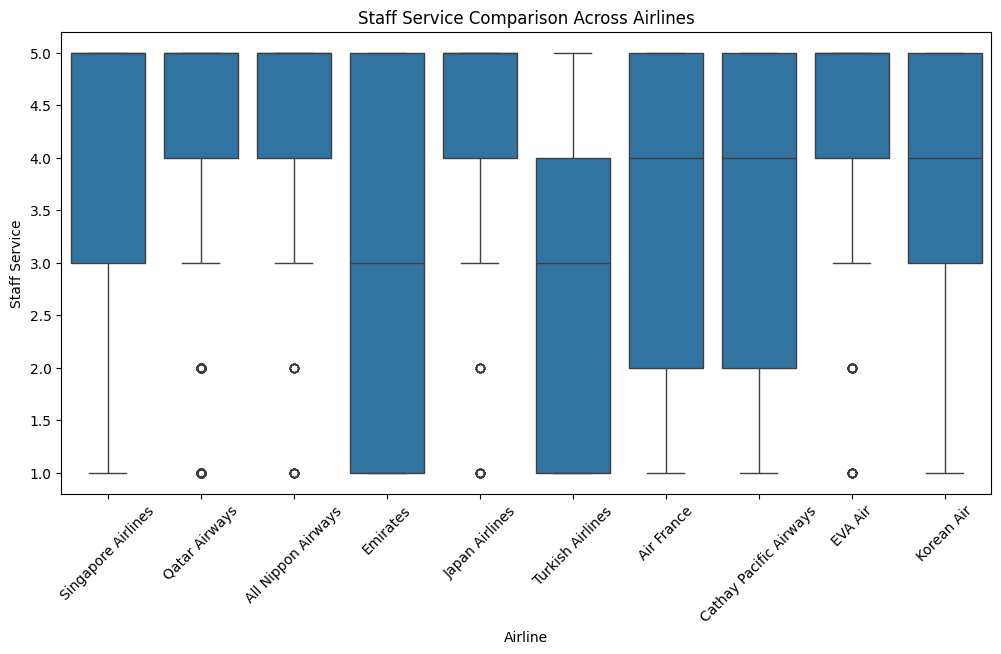

In [30]:
# Comparison of Seat Comfort ratings across airlines
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Seat Comfort', data=df)
plt.title('Seat Comfort Comparison Across Airlines')
plt.xticks(rotation=45)
plt.show()

# Comparison of Staff Service ratings across airlines
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Staff Service', data=df)
plt.title('Staff Service Comparison Across Airlines')
plt.xticks(rotation=45)
plt.show()


In [32]:
df


,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Cleaned_Reviews
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,flight amazing crew onboard flight welcoming g...
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,booking emergency exit seat still meant huge d...
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,excellent performance fronts would definitely ...
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,pretty comfortable flight considering flying e...
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,service consistently good start finish cabin c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,an uneventful flight,N Vickers,2016-06-20,Korean Air,True,"KE124, Brisbane to Incheon (A330) and KE867,...",Business,June 2016,BNE to ULN via ICN,Economy Class,5,4,5,3,4,7,yes,ke brisbane incheon ke incheon ulaanbaatar kor...
8096,Korean Air always impresses,Kim Holloway,2016-06-12,Korean Air,False,Our recent flight was our fourth trip to the...,Couple Leisure,June 2016,SYD to LHR via ICN,Economy Class,3,5,5,4,5,10,yes,recent flight fourth trip uk years sydney lond...
8097,didn’t offer anything,C Clark,2016-06-06,Korean Air,True,I flew Korean Air from Bali to Seoul in Pres...,Business,April 2016,DPS to ICN,Business Class,4,5,5,5,1,2,no,flew korean air bali seoul prestige class busi...
8098,appreciated the service onboard,E Petan,2016-04-21,Korean Air,False,Seoul to Paris with Korean Air. I am traveli...,Business,April 2016,ICN to CDG,Business Class,5,1,3,4,5,10,yes,seoul paris korean air traveling triathlon bik...


Dataset Shape: (8100, 18)

Missing Values:
 Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
Cleaned_Reviews           0
dtype: int64


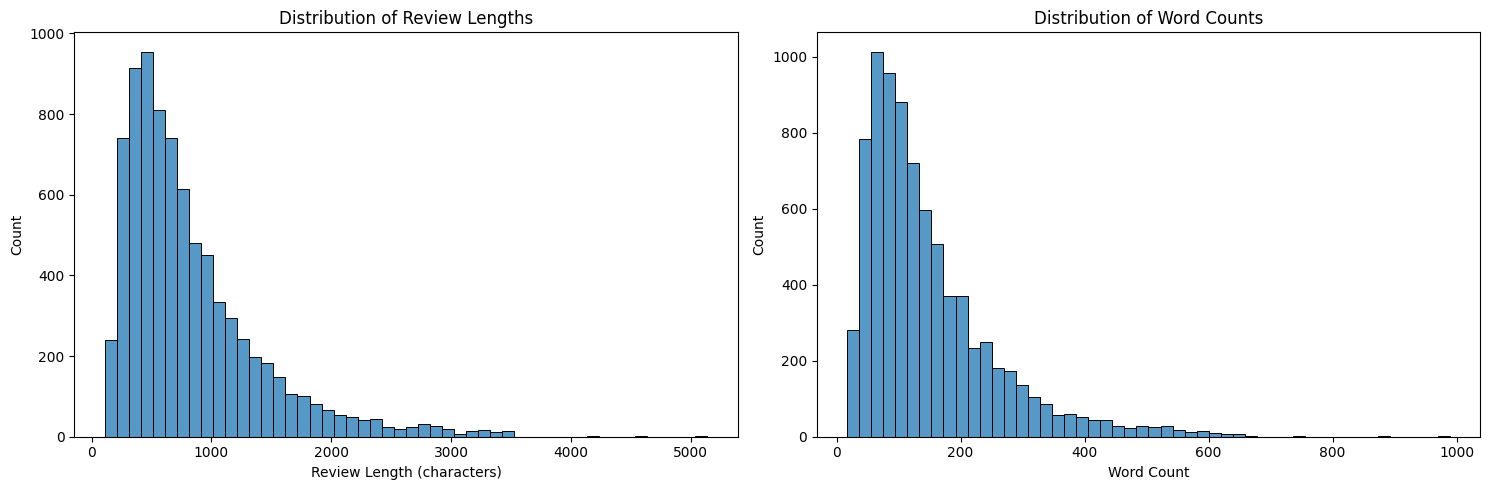

In [36]:
def perform_eda(df): # Changed self to df
    """Exploratory Data Analysis"""
    # Basic statistics
    print("Dataset Shape:", df.shape) # Changed self.df to df
    # Review length analysis
    df['review_length'] = df['Reviews'].str.len() # Assuming 'Reviews' is the text column
    df['word_count'] = df['Reviews'].str.split().str.len() # Assuming 'Reviews' is the text column

    # Create visualizations
    plt.figure(figsize=(15, 5))

    # Review length distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='review_length', bins=50) # Changed self.df to df
    plt.title('Distribution of Review Lengths')
    plt.xlabel('Review Length (characters)')

    # Word count distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x='word_count', bins=50) # Changed self.df to df
    plt.title('Distribution of Word Counts')
    plt.xlabel('Word Count')

    plt.tight_layout()
    plt.show()

perform_eda(df) # Calling the function with the DataFrame

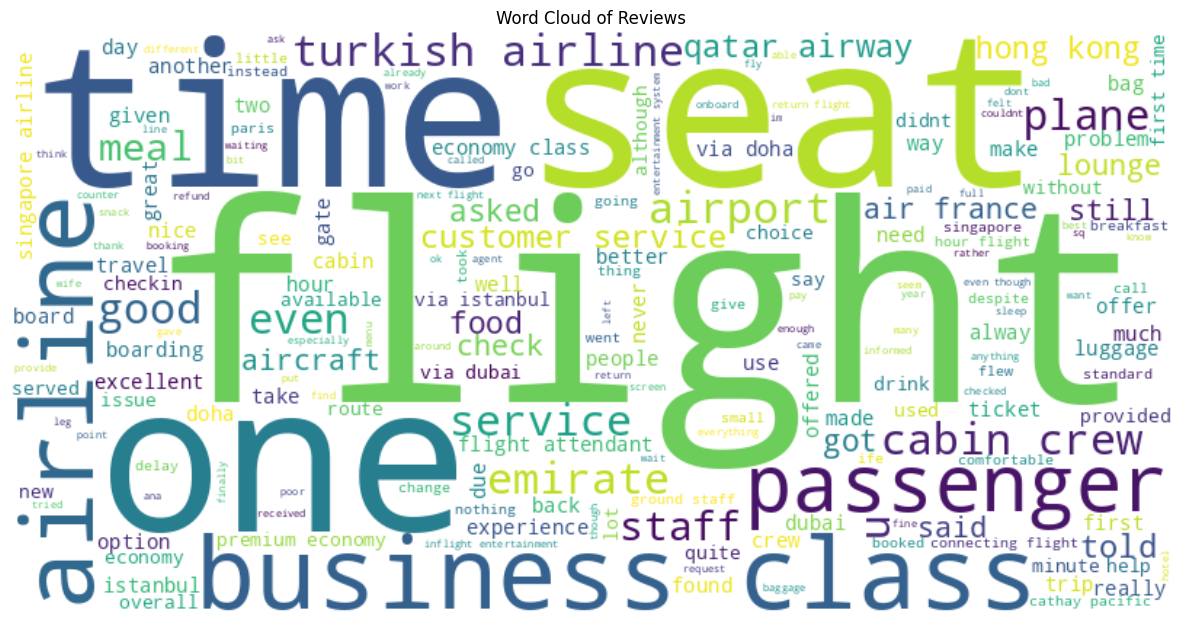

In [39]:
!pip install wordcloud
from wordcloud import WordCloud

import matplotlib.pyplot as plt

def generate_wordcloud(df, text_column='Cleaned_Reviews'): # Added text_column parameter with a default value
    """Generate word cloud from reviews"""
    all_words = ' '.join(df[text_column].astype(str)) # Accessing the column directly from the DataFrame
    wordcloud = WordCloud(width=800, height=400,
                        background_color='white').generate(all_words)

    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews')
    plt.show()

generate_wordcloud(df) # Calling the function with the DataFrame and optional text_column

In [40]:
# starting 3rd step sentimental analysis

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the text data (Reviews column)
X = tfidf.fit_transform(df['Cleaned_Reviews']).toarray()

# Get the feature names (words)
feature_names = tfidf.get_feature_names_out()
print("Features:", feature_names[:10])  # Displaying first 10 features for inspection


Features: ['aa' 'ababa' 'abandoned' 'ability' 'able' 'aboard' 'abreast' 'abroad'
 'abrupt' 'abruptly']


In [53]:
from sklearn.preprocessing import LabelEncoder

# Encode the Recommended column as binary values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Recommended'])


In [54]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.921604938271605
Precision: 0.9178082191780822
Recall: 0.9359720605355064


In [71]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Define the sentiment analysis function
def perform_sentiment_analysis(reviews):
    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # List to hold sentiment labels
    sentiments = []

    # Iterate over each review
    for review in reviews:
        # Get the sentiment score for each review
        score = sia.polarity_scores(review)['compound']

        # Determine sentiment based on the score
        if score >= 0.05:
            sentiments.append('Positive')
        elif score <= -0.05:
            sentiments.append('Negative')
        else:
            sentiments.append('Neutral')

    return sentiments

def perform_sentiment_analysis1(df, text_column='Cleaned_Reviews'): # Added text_column as parameter
    """Perform sentiment analysis using VADER"""
    sid = SentimentIntensityAnalyzer() # Initialize SentimentIntensityAnalyzer inside the function

    # Get VADER sentiment scores
    df['vader_scores'] = df[text_column].apply(lambda x: sid.polarity_scores(x))
    df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])

    # Add sentiment categories
    df['sentiment_category'] = df['vader_compound'].apply(
        lambda x: 'Positive' if x > 0.05
        else ('Negative' if x < -0.05 else 'Neutral')
    )

    # Visualize sentiment distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='sentiment_category')
    plt.title('Distribution of Sentiment Categories')
    plt.show()

    # Calculate average sentiment by category (if available)
    if 'category' in df.columns:
        avg_sentiment = df.groupby('category')['vader_compound'].mean()

        plt.figure(figsize=(12, 6))
        avg_sentiment.sort_values().plot(kind='bar')
        plt.title('Average Sentiment by Category')
        plt.xlabel('Category')
        plt.ylabel('Average Sentiment Score')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [59]:
df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Cleaned_Reviews,review_length,word_count
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,flight amazing crew onboard flight welcoming g...,467,86
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,booking emergency exit seat still meant huge d...,249,42
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,excellent performance fronts would definitely ...,196,29
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,pretty comfortable flight considering flying e...,991,166
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,service consistently good start finish cabin c...,310,53


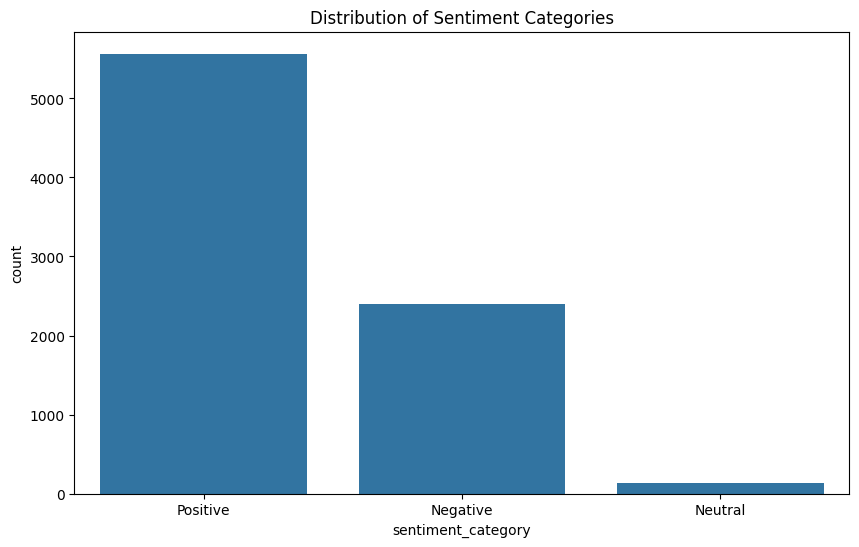

In [72]:
perform_sentiment_analysis1(df, text_column='Cleaned_Reviews')


In [73]:
df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,...,Value For Money,Overall Rating,Recommended,Cleaned_Reviews,review_length,word_count,Sentiment,vader_scores,vader_compound,sentiment_category
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,...,4,9,yes,flight amazing crew onboard flight welcoming g...,467,86,Neutral,"{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp...",0.9729,Positive
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,...,1,3,no,booking emergency exit seat still meant huge d...,249,42,Neutral,"{'neg': 0.422, 'neu': 0.45, 'pos': 0.128, 'com...",-0.8957,Negative
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,...,5,10,yes,excellent performance fronts would definitely ...,196,29,Neutral,"{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp...",0.7506,Positive
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,...,5,10,yes,pretty comfortable flight considering flying e...,991,166,Neutral,"{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.9777,Positive
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,...,5,10,yes,service consistently good start finish cabin c...,310,53,Neutral,"{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'comp...",0.9521,Positive


In [84]:
class AdvancedAirlineAnalyzer:
    def __init__(self, df):
        self.df = df

    def analyze_by_traveller_type(self):
        """Analyze sentiment patterns across different traveller types"""
        plt.figure(figsize=(12, 6))

        # Average sentiment by traveller type
        avg_sentiment = self.df.groupby('Type of Traveller')['vader_compound'].mean().sort_values()

        # Create bar plot
        sns.barplot(x=avg_sentiment.index, y=avg_sentiment.values)
        plt.title('Average Sentiment Score by Traveller Type')
        plt.xticks(rotation=45)
        plt.ylabel('Average Sentiment Score')
        plt.tight_layout()
        plt.show()

        # Detailed breakdown
        traveller_stats = pd.DataFrame({
            'Average_Sentiment': self.df.groupby('Type of Traveller')['vader_compound'].mean(),
            'Review_Count': self.df.groupby('Type of Traveller').size(),
            'Positive_Reviews': self.df.groupby('Type of Traveller')['sentiment_category']
                                  .apply(lambda x: (x == 'Positive').sum()),
            'Negative_Reviews': self.df.groupby('Type of Traveller')['sentiment_category']
                                  .apply(lambda x: (x == 'Negative').sum())
        })

        traveller_stats['Positive_Ratio'] = (traveller_stats['Positive_Reviews'] /
                                           traveller_stats['Review_Count'] * 100).round(2)

        return traveller_stats

    def compare_airlines(self):
        """Compare performance metrics across airlines"""
        # Calculate key metrics by airline
        airline_metrics = pd.DataFrame({
            'Average_Sentiment': self.df.groupby('Airline')['vader_compound'].mean(),
            'Review_Count': self.df.groupby('Airline').size(),
            'Satisfaction_Rate': self.df.groupby('Airline')['sentiment_category']
                                   .apply(lambda x: (x == 'Positive').mean() * 100)
        })

        # Visualize airline comparison
        fig, axes = plt.subplots(2, 1, figsize=(15, 12))

        # Average sentiment by airline
        sns.barplot(data=self.df, x='Airline', y='vader_compound',
                   ax=axes[0], ci=95)
        axes[0].set_title('Average Sentiment Score by Airline')
        axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

        # Satisfaction rate by airline
        sns.barplot(x=airline_metrics.index, y=airline_metrics['Satisfaction_Rate'],
                   ax=axes[1])
        axes[1].set_title('Customer Satisfaction Rate by Airline (%)')
        axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

        plt.tight_layout()
        plt.show()

        return airline_metrics

    def analyze_by_class(self):
        """Analyze reviews and sentiment by cabin class"""
        # Calculate metrics by class
        class_metrics = pd.DataFrame({
            'Average_Sentiment': self.df.groupby('Class')['vader_compound'].mean(),
            'Review_Count': self.df.groupby('Class').size(),
            'Average_Rating': self.df.groupby('Class')['Overall Rating'].mean()
        })

        # Visualize class analysis
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Sentiment distribution by class
        sns.boxplot(data=self.df, x='Class', y='vader_compound',
                   ax=axes[0, 0])
        axes[0, 0].set_title('Sentiment Distribution by Cabin Class')
        axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

        # Average rating by class
        sns.barplot(data=self.df, x='Class', y='Overall Rating',
                   ax=axes[0, 1])
        axes[0, 1].set_title('Average Rating by Cabin Class')
        axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

        # Review count by class
        sns.countplot(data=self.df, x='Class', ax=axes[1, 0])
        axes[1, 0].set_title('Number of Reviews by Cabin Class')
        axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

        # Sentiment category distribution by class
        sentiment_by_class = pd.crosstab(self.df['Class'],
                                       self.df['sentiment_category'],
                                       normalize='index') * 100
        sentiment_by_class.plot(kind='bar', stacked=True, ax=axes[1, 1])
        axes[1, 1].set_title('Sentiment Distribution by Cabin Class (%)')
        axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

        plt.tight_layout()
        plt.show()

        return class_metrics

    def identify_key_topics(self):
        """Identify key topics/themes in reviews by category"""
        from sklearn.feature_extraction.text import CountVectorizer

        def get_top_ngrams(text_series, n_gram_range=(1, 2), top_n=10):
            vectorizer = CountVectorizer(ngram_range=n_gram_range,
                                       stop_words='english')
            ngrams = vectorizer.fit_transform(text_series)
            vocab = vectorizer.get_feature_names_out()

            # Get top n-grams
            count_values = ngrams.sum(axis=0).A1
            top_indices = count_values.argsort()[-top_n:][::-1]
            return [(vocab[i], count_values[i]) for i in top_indices]

        # Analyze topics by sentiment category
        topics_by_sentiment = {}
        for category in self.df['sentiment_category'].unique():
            category_reviews = self.df[self.df['sentiment_category'] == category]['Cleaned_Reviews']
            topics_by_sentiment[category] = get_top_ngrams(category_reviews)

        # Analyze topics by cabin class
        topics_by_class = {}
        for class_type in self.df['Class'].unique():
            class_reviews = self.df[self.df['Class'] == class_type]['Cleaned_Reviews']
            topics_by_class[class_type] = get_top_ngrams(class_reviews)

        return topics_by_sentiment, topics_by_class

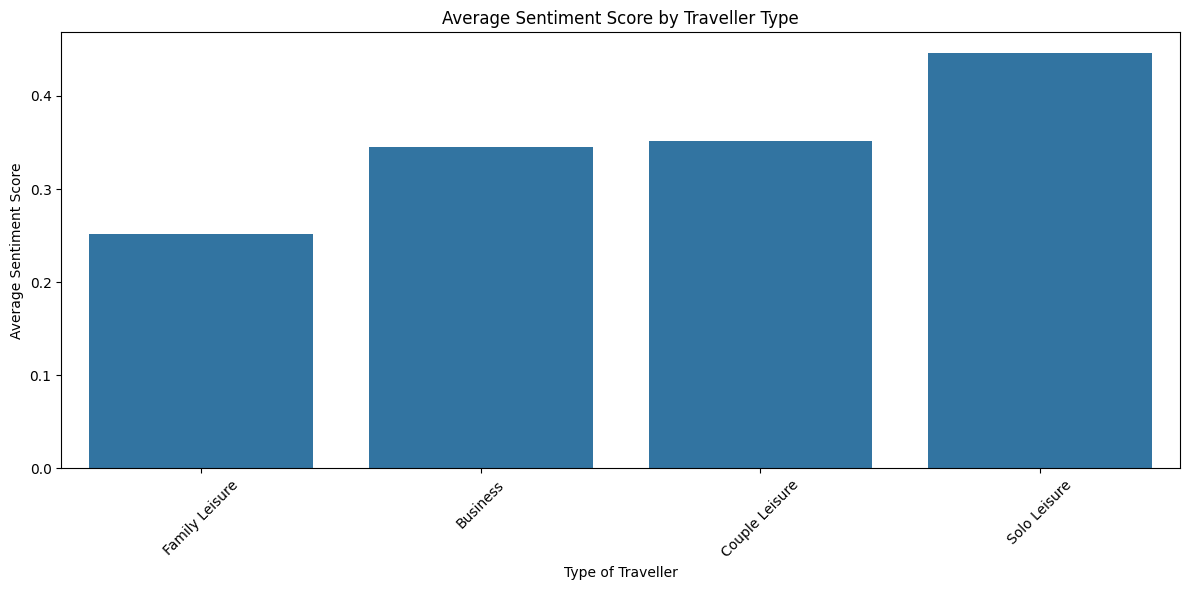

<ipython-input-84-8ae6a9df11bd>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=self.df, x='Airline', y='vader_compound',
<ipython-input-84-8ae6a9df11bd>:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-84-8ae6a9df11bd>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


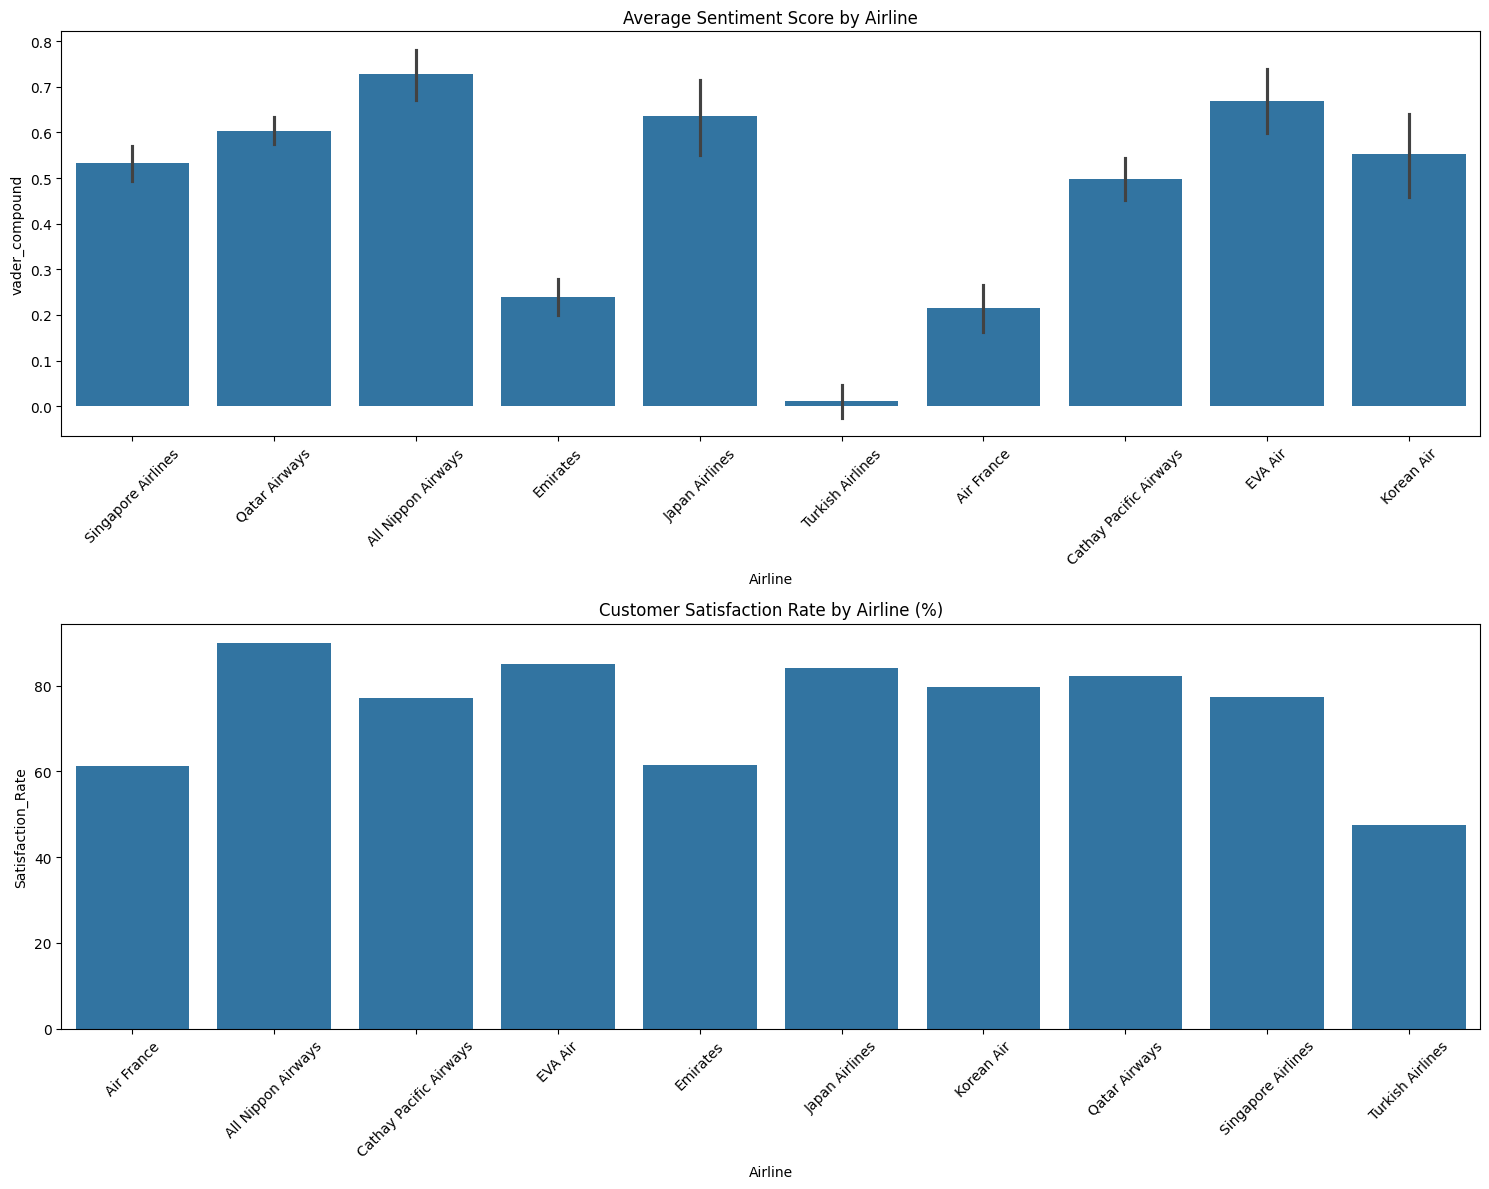

<ipython-input-84-8ae6a9df11bd>:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
<ipython-input-84-8ae6a9df11bd>:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
<ipython-input-84-8ae6a9df11bd>:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)


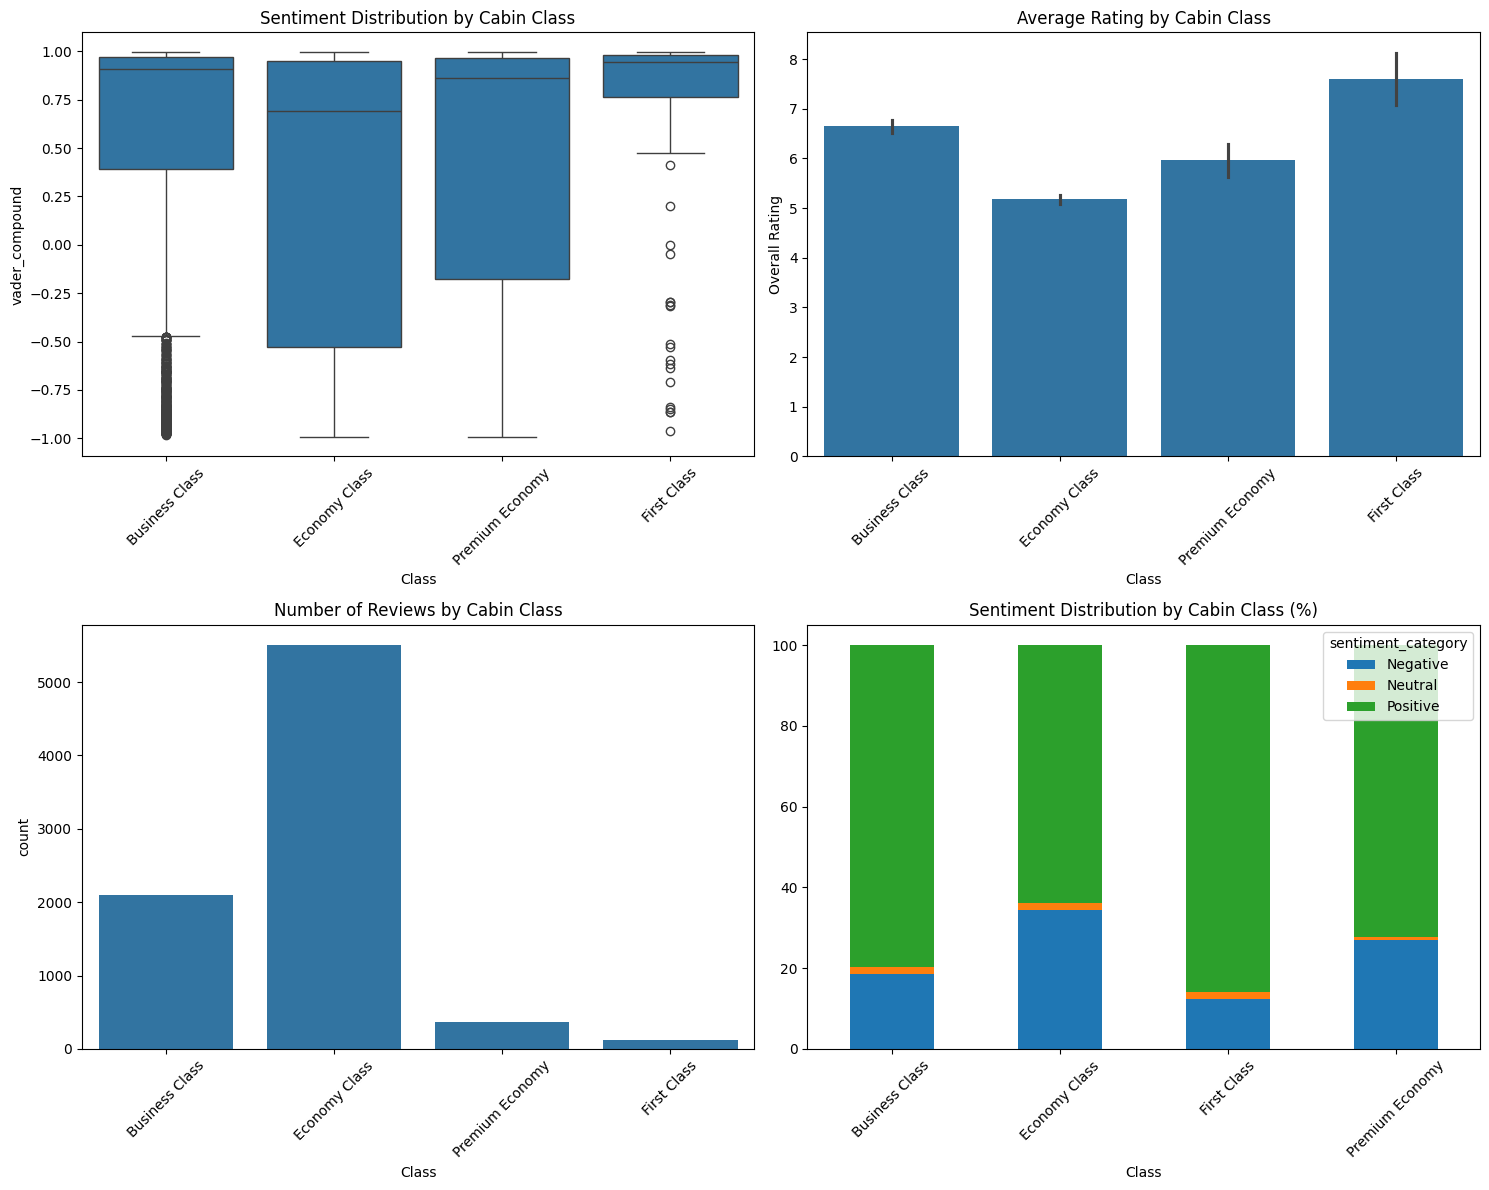

In [85]:
advanced_analyzer = AdvancedAirlineAnalyzer(df)
traveller_analysis = advanced_analyzer.analyze_by_traveller_type()
airline_comparison = advanced_analyzer.compare_airlines()
class_analysis = advanced_analyzer.analyze_by_class()
sentiment_topics, class_topics = advanced_analyzer.identify_key_topics()


In [89]:
import numpy as np
def analyze_airline_sentiment_distribution(df):
    """
    Analyze and visualize sentiment distribution by airline and create rankings
    """
    # Calculate sentiment distribution for each airline
    airline_sentiment = pd.DataFrame({
        'Total_Reviews': df.groupby('Airline').size(),
        'Avg_Sentiment': df.groupby('Airline')['vader_compound'].mean(),
        'Positive_Ratio': df.groupby('Airline')['sentiment_category']
                           .apply(lambda x: (x == 'Positive').mean() * 100),
        'Neutral_Ratio': df.groupby('Airline')['sentiment_category']
                          .apply(lambda x: (x == 'Neutral').mean() * 100),
        'Negative_Ratio': df.groupby('Airline')['sentiment_category']
                           .apply(lambda x: (x == 'Negative').mean() * 100)
    })

    # Create rankings
    airline_sentiment['Sentiment_Rank'] = airline_sentiment['Avg_Sentiment'].rank(ascending=False)
    airline_sentiment = airline_sentiment.sort_values('Avg_Sentiment', ascending=False)

    # Calculate confidence intervals for more robust ranking
    airline_sentiment['CI_Lower'] = df.groupby('Airline')['vader_compound'].agg(
        lambda x: np.percentile(x, 2.5)
    )
    airline_sentiment['CI_Upper'] = df.groupby('Airline')['vader_compound'].agg(
        lambda x: np.percentile(x, 97.5)
    )

    # Visualizations
    plt.figure(figsize=(15, 10))

    # 1. Sentiment Distribution Stacked Bar Chart
    sentiment_dist = pd.DataFrame({
        'Positive': airline_sentiment['Positive_Ratio'],
        'Neutral': airline_sentiment['Neutral_Ratio'],
        'Negative': airline_sentiment['Negative_Ratio']
    })

    ax = sentiment_dist.plot(kind='bar', stacked=True,
                           color=['#2ecc71', '#95a5a6', '#e74c3c'])
    plt.title('Sentiment Distribution by Airline')
    plt.xlabel('Airline')
    plt.ylabel('Percentage of Reviews')
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 2. Average Sentiment with Confidence Intervals
    plt.figure(figsize=(15, 8))
    airlines = airline_sentiment.index
    avg_sentiments = airline_sentiment['Avg_Sentiment']
    ci_lower = airline_sentiment['CI_Lower']
    ci_upper = airline_sentiment['CI_Upper']

    plt.errorbar(airlines, avg_sentiments,
                yerr=[avg_sentiments - ci_lower, ci_upper - avg_sentiments],
                fmt='o', capsize=5)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    plt.title('Average Sentiment Score by Airline with 95% Confidence Intervals')
    plt.xlabel('Airline')
    plt.ylabel('Average Sentiment Score')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Create detailed ranking table
    ranking_table = pd.DataFrame({
        'Rank': airline_sentiment['Sentiment_Rank'],
        'Airline': airline_sentiment.index,
        'Average_Sentiment': airline_sentiment['Avg_Sentiment'].round(3),
        'Positive_Reviews_%': airline_sentiment['Positive_Ratio'].round(1),
        'Negative_Reviews_%': airline_sentiment['Negative_Ratio'].round(1),
        'Total_Reviews': airline_sentiment['Total_Reviews'],
        'Confidence_Interval': [f"({ci_lower:.3f}, {ci_upper:.3f})"
                              for ci_lower, ci_upper
                              in zip(airline_sentiment['CI_Lower'],
                                    airline_sentiment['CI_Upper'])]
    }).sort_values('Rank')

    return ranking_table, airline_sentiment

<Figure size 1500x1000 with 0 Axes>

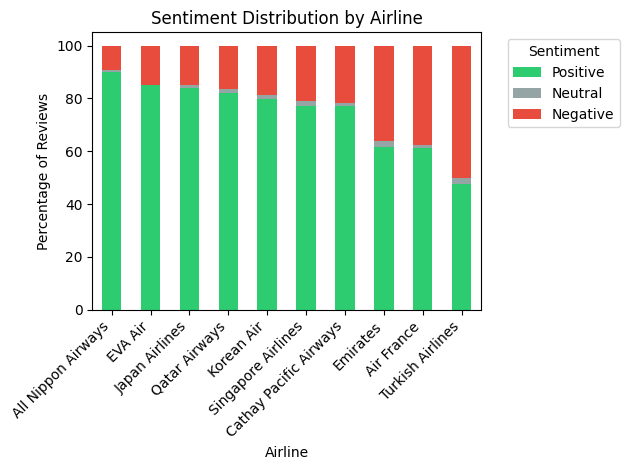

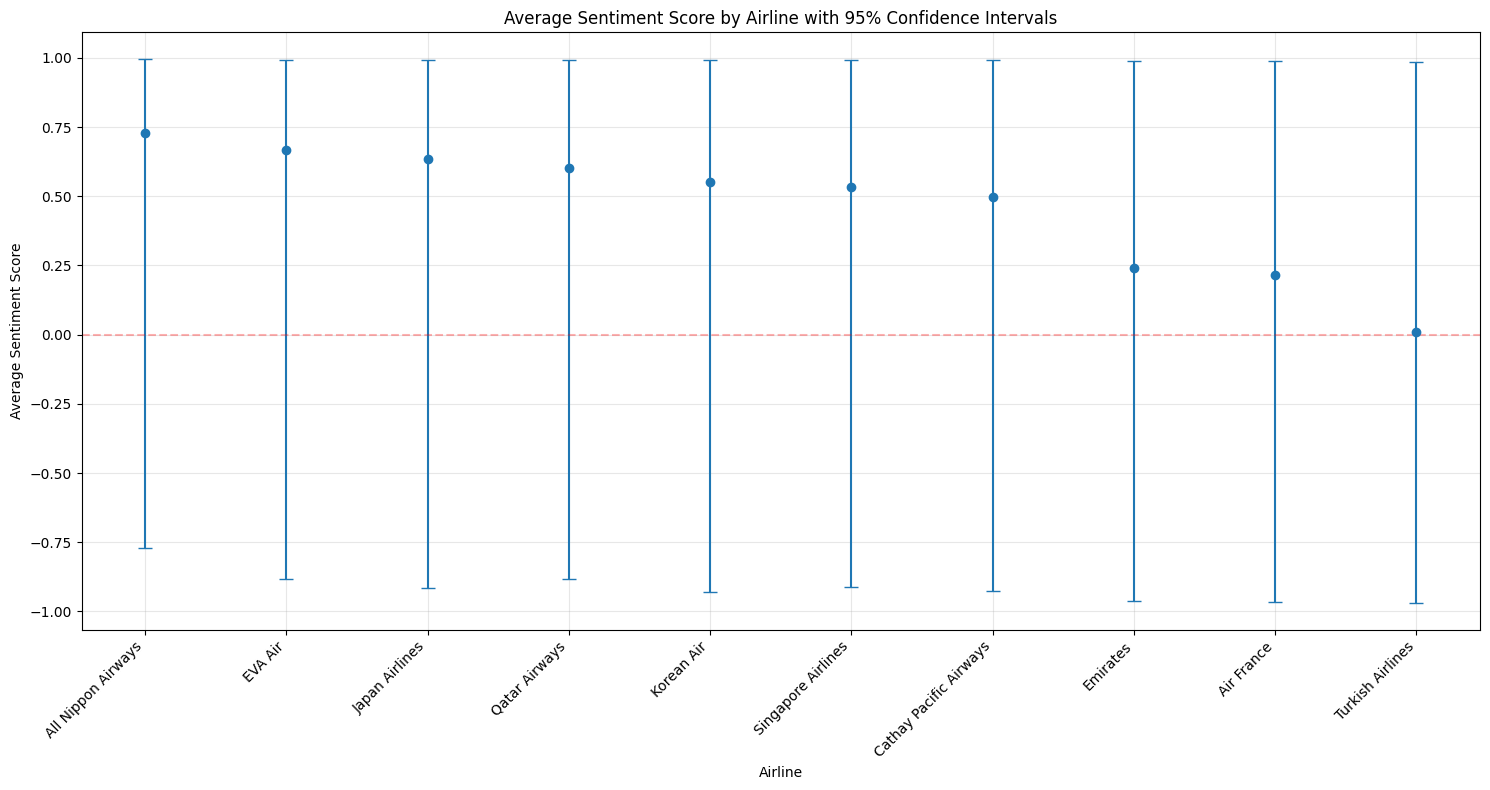


Airline Rankings Based on Sentiment Analysis:
                        Rank                 Airline  Average_Sentiment  \
Airline                                                                   
All Nippon Airways       1.0      All Nippon Airways              0.727   
EVA Air                  2.0                 EVA Air              0.669   
Japan Airlines           3.0          Japan Airlines              0.635   
Qatar Airways            4.0           Qatar Airways              0.604   
Korean Air               5.0              Korean Air              0.552   
Singapore Airlines       6.0      Singapore Airlines              0.532   
Cathay Pacific Airways   7.0  Cathay Pacific Airways              0.497   
Emirates                 8.0                Emirates              0.240   
Air France               9.0              Air France              0.216   
Turkish Airlines        10.0        Turkish Airlines              0.011   

                        Positive_Reviews_%  Negative

In [90]:
ranking_table, airline_sentiment_data = analyze_airline_sentiment_distribution(df)
print("\nAirline Rankings Based on Sentiment Analysis:")
print(ranking_table)

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class AirlineCombinedAnalyzer:
    def __init__(self, df):
        self.df = df
        self.rating_columns = [
            'Seat Comfort',
            'Staff Service',
            'Food & Beverages',
            'Inflight Entertainment',
            'Value For Money'
        ]

    def analyze_ratings_and_sentiment(self):
        """Combine explicit ratings with sentiment analysis"""
        # Calculate average ratings
        ratings_analysis = pd.DataFrame({
            'Average_Rating': self.df[self.rating_columns].mean(),
            'Rating_StdDev': self.df[self.rating_columns].std(),
            'Low_Ratings': self.df[self.rating_columns].apply(lambda x: (x <= 2).mean() * 100),
            'High_Ratings': self.df[self.rating_columns].apply(lambda x: (x >= 4).mean() * 100)
        })

        # Calculate sentiment correlation
        sentiment_correlation = {}
        for col in self.rating_columns:
            sentiment_correlation[col] = self.df[col].corr(self.df['vader_compound'])

        ratings_analysis['Sentiment_Correlation'] = pd.Series(sentiment_correlation)

        return ratings_analysis

    def visualize_combined_analysis(self, ratings_analysis):
        """Create comprehensive visualizations"""
        # 1. Ratings Distribution
        plt.figure(figsize=(15, 10))
        sns.boxplot(data=self.df[self.rating_columns])
        plt.title('Distribution of Ratings Across Different Aspects')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Rating Score')
        plt.tight_layout()
        plt.show()

        # 2. Average Ratings with Confidence Intervals
        plt.figure(figsize=(15, 6))
        average_ratings = self.df[self.rating_columns].mean()
        ci = self.df[self.rating_columns].agg(lambda x: np.percentile(x, [2.5, 97.5]))

        plt.errorbar(average_ratings.index, average_ratings,
                    yerr=[average_ratings - ci.iloc[0], ci.iloc[1] - average_ratings],
                    fmt='o', capsize=5)
        plt.title('Average Ratings with 95% Confidence Intervals')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # 3. Rating vs Sentiment Correlation
        plt.figure(figsize=(12, 6))
        sns.barplot(x=ratings_analysis.index,
                   y=ratings_analysis['Sentiment_Correlation'],
                   palette='RdYlBu')
        plt.title('Correlation between Ratings and Sentiment Scores')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Correlation Coefficient')
        plt.tight_layout()
        plt.show()

        # 4. High vs Low Ratings Distribution
        plt.figure(figsize=(12, 6))
        x = np.arange(len(self.rating_columns))
        width = 0.35

        plt.bar(x - width/2, ratings_analysis['High_Ratings'],
               width, label='High Ratings (≥4)', color='green', alpha=0.6)
        plt.bar(x + width/2, ratings_analysis['Low_Ratings'],
               width, label='Low Ratings (≤2)', color='red', alpha=0.6)

        plt.xlabel('Aspects')
        plt.ylabel('Percentage of Reviews')
        plt.title('Distribution of High and Low Ratings')
        plt.xticks(x, self.rating_columns, rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()

    def generate_comprehensive_insights(self, ratings_analysis):
        """Generate insights combining ratings and sentiment"""
        insights = []

        # Overall Performance
        insights.append("📊 Overall Performance Analysis:")
        for aspect in self.rating_columns:
            avg_rating = ratings_analysis.loc[aspect, 'Average_Rating']
            sent_corr = ratings_analysis.loc[aspect, 'Sentiment_Correlation']
            high_rate = ratings_analysis.loc[aspect, 'High_Ratings']

            insights.append(f"\n{aspect}:")
            insights.append(f"- Average Rating: {avg_rating:.2f}/5")
            insights.append(f"- {high_rate:.1f}% of reviews gave high ratings (≥4)")
            insights.append(f"- Sentiment Correlation: {sent_corr:.2f}")

        # Key Strengths
        top_aspects = ratings_analysis.nlargest(2, 'Average_Rating')
        insights.append("\n🌟 Key Strengths:")
        for aspect in top_aspects.index:
            insights.append(f"- {aspect}: {top_aspects.loc[aspect, 'Average_Rating']:.2f}/5")

        # Improvement Areas
        bottom_aspects = ratings_analysis.nsmallest(2, 'Average_Rating')
        insights.append("\n🎯 Priority Improvement Areas:")
        for aspect in bottom_aspects.index:
            insights.append(f"- {aspect}: {bottom_aspects.loc[aspect, 'Average_Rating']:.2f}/5")

        # Most Consistent Aspects
        most_consistent = ratings_analysis.nsmallest(2, 'Rating_StdDev')
        insights.append("\n🎯 Most Consistent Service Areas:")
        for aspect in most_consistent.index:
            insights.append(f"- {aspect}: StdDev = {most_consistent.loc[aspect, 'Rating_StdDev']:.2f}")

        return "\n".join(insights)

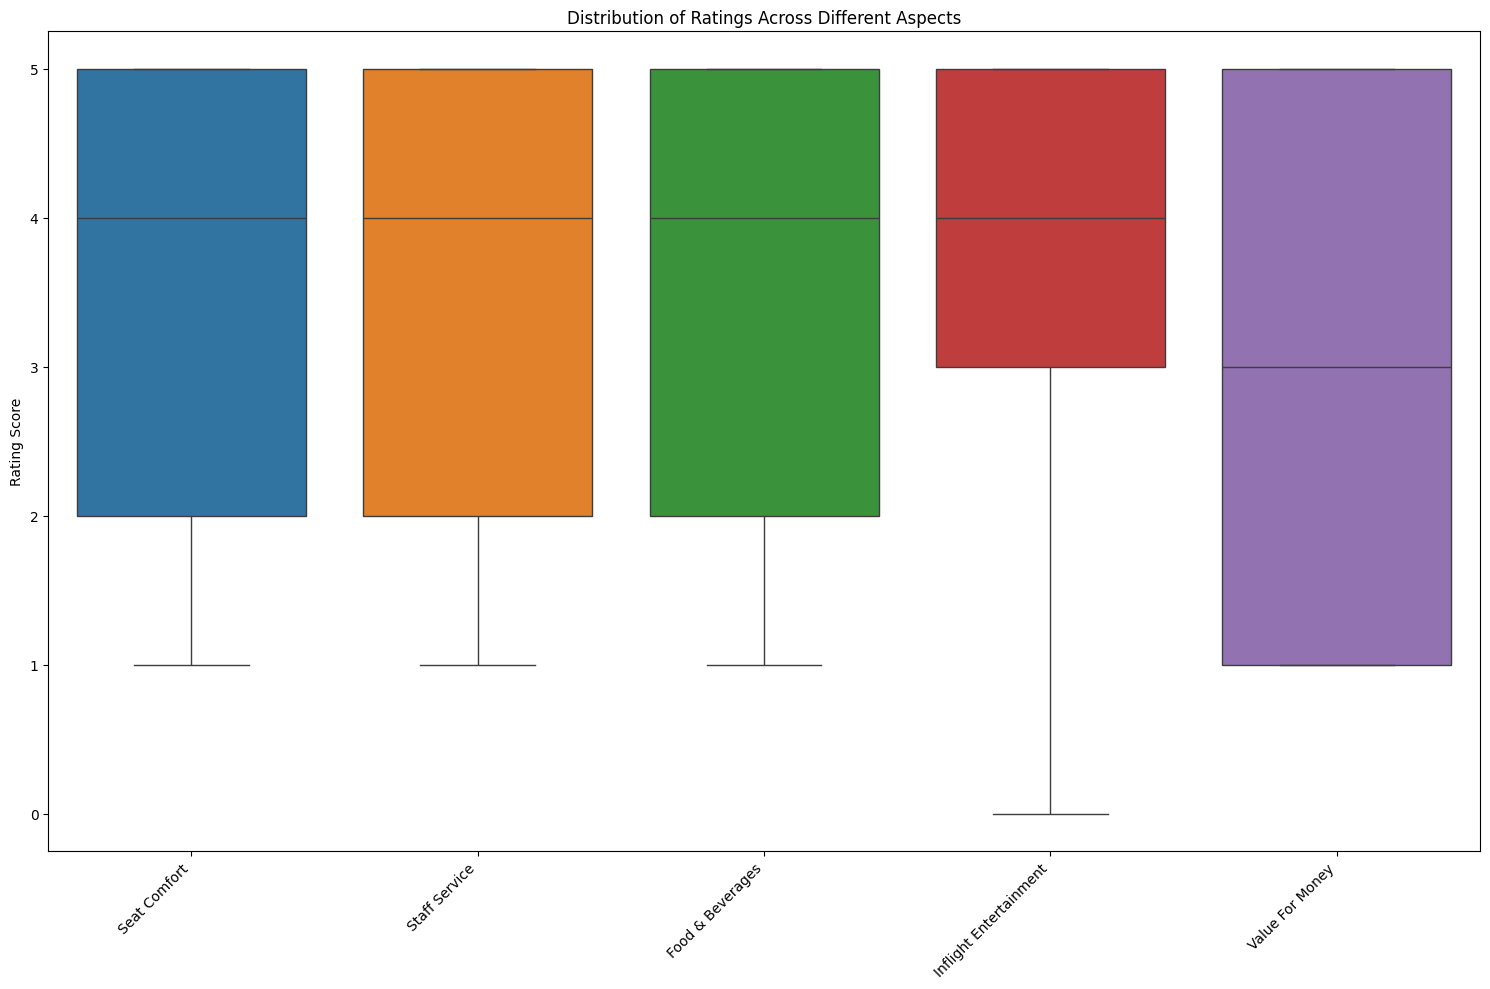

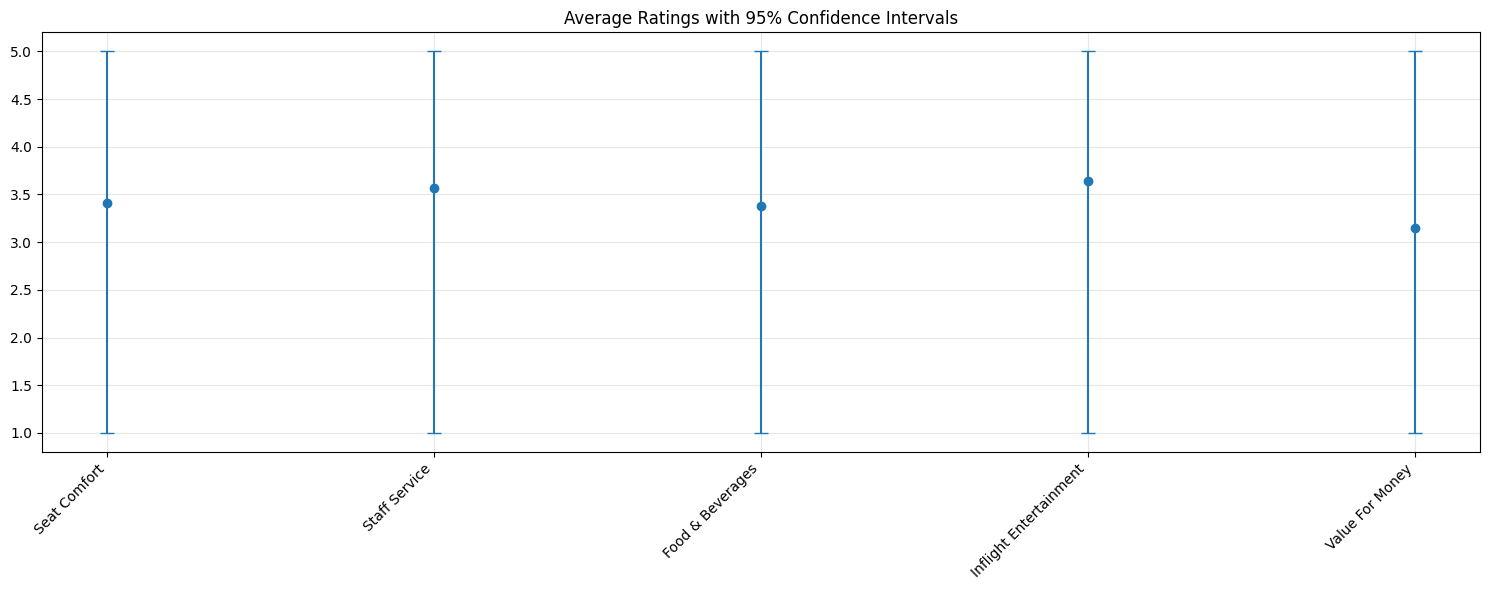

<ipython-input-91-a7dee0f79d0c>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_analysis.index,


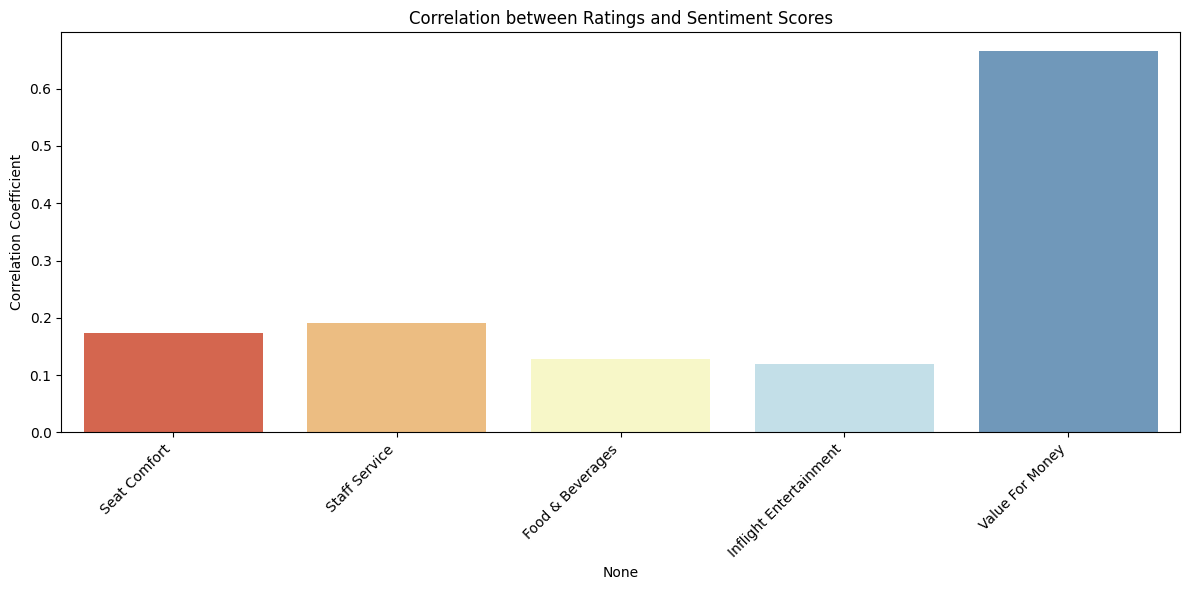

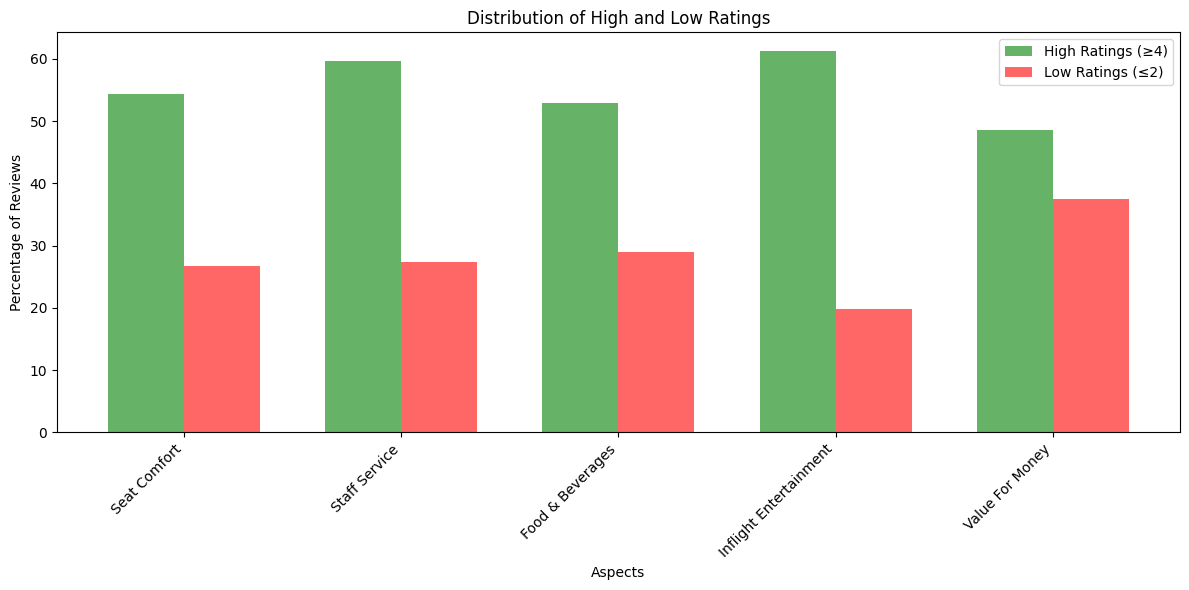

📊 Overall Performance Analysis:

Seat Comfort:
- Average Rating: 3.41/5
- 54.4% of reviews gave high ratings (≥4)
- Sentiment Correlation: 0.17

Staff Service:
- Average Rating: 3.57/5
- 59.6% of reviews gave high ratings (≥4)
- Sentiment Correlation: 0.19

Food & Beverages:
- Average Rating: 3.38/5
- 52.9% of reviews gave high ratings (≥4)
- Sentiment Correlation: 0.13

Inflight Entertainment:
- Average Rating: 3.64/5
- 61.2% of reviews gave high ratings (≥4)
- Sentiment Correlation: 0.12

Value For Money:
- Average Rating: 3.15/5
- 48.6% of reviews gave high ratings (≥4)
- Sentiment Correlation: 0.66

🌟 Key Strengths:
- Inflight Entertainment: 3.64/5
- Staff Service: 3.57/5

🎯 Priority Improvement Areas:
- Value For Money: 3.15/5
- Food & Beverages: 3.38/5

🎯 Most Consistent Service Areas:
- Inflight Entertainment: StdDev = 1.31
- Seat Comfort: StdDev = 1.40


In [92]:
# Initialize analyzer
analyzer = AirlineCombinedAnalyzer(df)

# Perform analysis
ratings_analysis = analyzer.analyze_ratings_and_sentiment()

# Generate visualizations
analyzer.visualize_combined_analysis(ratings_analysis)

# Get comprehensive insights
insights = analyzer.generate_comprehensive_insights(ratings_analysis)
print(insights)

In [93]:
df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,...,Value For Money,Overall Rating,Recommended,Cleaned_Reviews,review_length,word_count,Sentiment,vader_scores,vader_compound,sentiment_category
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,...,4,9,yes,flight amazing crew onboard flight welcoming g...,467,86,Neutral,"{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp...",0.9729,Positive
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,...,1,3,no,booking emergency exit seat still meant huge d...,249,42,Neutral,"{'neg': 0.422, 'neu': 0.45, 'pos': 0.128, 'com...",-0.8957,Negative
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,...,5,10,yes,excellent performance fronts would definitely ...,196,29,Neutral,"{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp...",0.7506,Positive
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,...,5,10,yes,pretty comfortable flight considering flying e...,991,166,Neutral,"{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.9777,Positive
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,...,5,10,yes,service consistently good start finish cabin c...,310,53,Neutral,"{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'comp...",0.9521,Positive


Top 50 keywords in negative reviews:
flight: 4971
service: 1806
airlines: 1409
us: 1395
hours: 1326
time: 1321
airport: 1276
airline: 1271
one: 1158
staff: 1132
turkish: 1113
istanbul: 1084
customer: 1015
emirates: 1006
get: 995
told: 995
seat: 985
would: 961
via: 929
seats: 844
even: 828
back: 819
ticket: 801
food: 782
dubai: 747
luggage: 737
experience: 729
passengers: 718
flights: 705
never: 692
air: 690
class: 688
business: 688
said: 686
could: 686
asked: 677
next: 667
first: 649
plane: 647
hour: 647
got: 629
another: 620
crew: 605
fly: 598
boarding: 587
delayed: 577
day: 559
new: 546
didnt: 541
singapore: 539


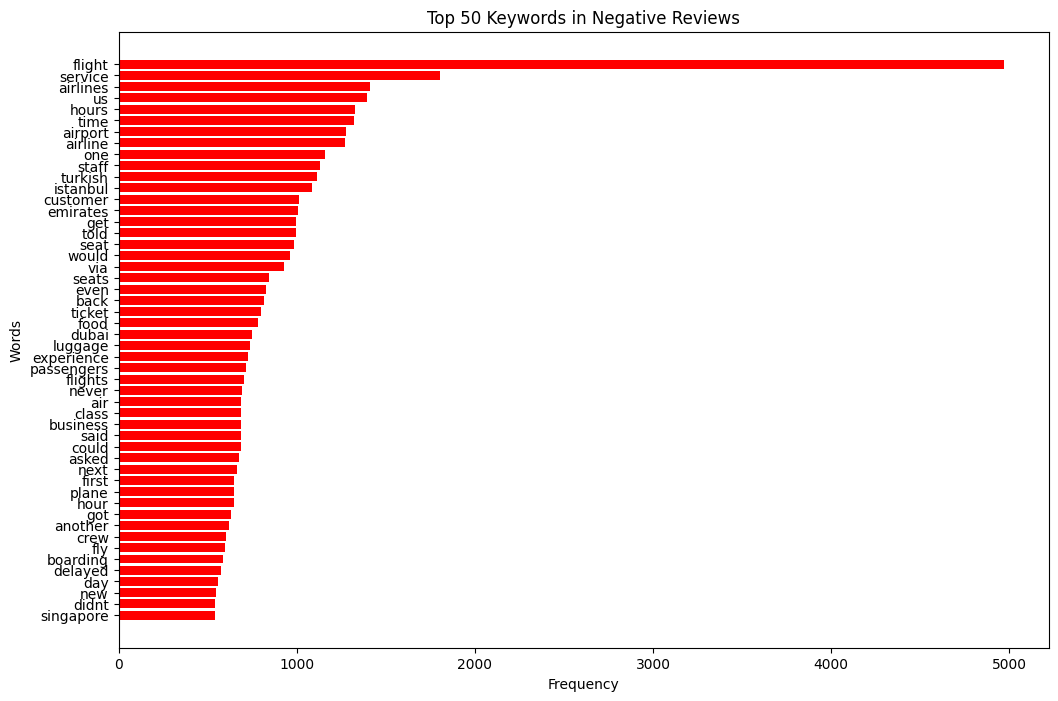

In [94]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from wordcloud import WordCloud

# Filter for negative reviews
negative_reviews = df[df['sentiment_category'] == 'Negative']['Cleaned_Reviews']

# Combine all negative reviews into a single string
negative_text = ' '.join(negative_reviews)

# Tokenize the text into words
negative_words = negative_text.split()

# Calculate the frequency distribution of words
negative_freq_dist = FreqDist(negative_words)

# Get the top 50 most common words
top_50_negative = negative_freq_dist.most_common(50)

# Print the top 50 negative keywords
print("Top 50 keywords in negative reviews:")
for word, freq in top_50_negative:
    print(f"{word}: {freq}")

# Create a bar plot for the top 50 negative keywords
words, counts = zip(*top_50_negative)
plt.figure(figsize=(12, 8))
plt.barh(words, counts, color='red')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Keywords in Negative Reviews")
plt.gca().invert_yaxis()  # Reverse the order to display the highest frequency at the top
plt.show()

Pain Points in Negative Reviews:
Delays: 3673
Customer Service: 3659
Comfort: 2234
Food: 1612
Baggage: 1571


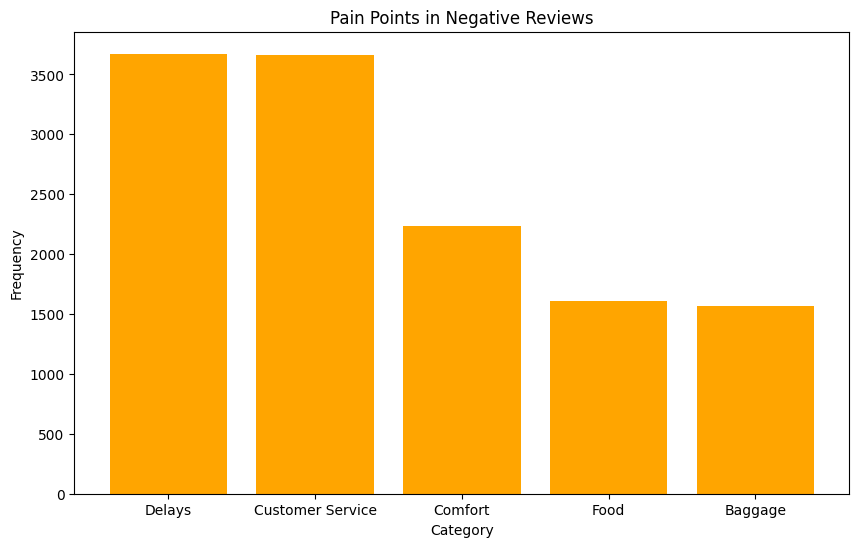

In [95]:
# Filter negative reviews again
negative_reviews = df[df['sentiment_category'] == 'Negative']['Cleaned_Reviews']

# Combine all negative reviews into a single string
negative_text = ' '.join(negative_reviews)

# List of example categories with associated keywords
categories = {
    "Delays": ["delay", "delayed", "waiting", "time"],
    "Customer Service": ["staff", "service", "rude", "attitude"],
    "Comfort": ["seat", "legroom", "space", "cramped"],
    "Food": ["food", "meal", "tasteless", "quality"],
    "Baggage": ["baggage", "luggage", "lost", "damaged"]
}

# Count occurrences of each category in negative reviews
pain_points = {category: sum(negative_text.count(word) for word in words)
               for category, words in categories.items()}

# Display results
print("Pain Points in Negative Reviews:")
for category, count in pain_points.items():
    print(f"{category}: {count}")

# Visualize pain points
plt.figure(figsize=(10, 6))
plt.bar(pain_points.keys(), pain_points.values(), color='orange')
plt.title("Pain Points in Negative Reviews")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()


<Figure size 1400x800 with 0 Axes>

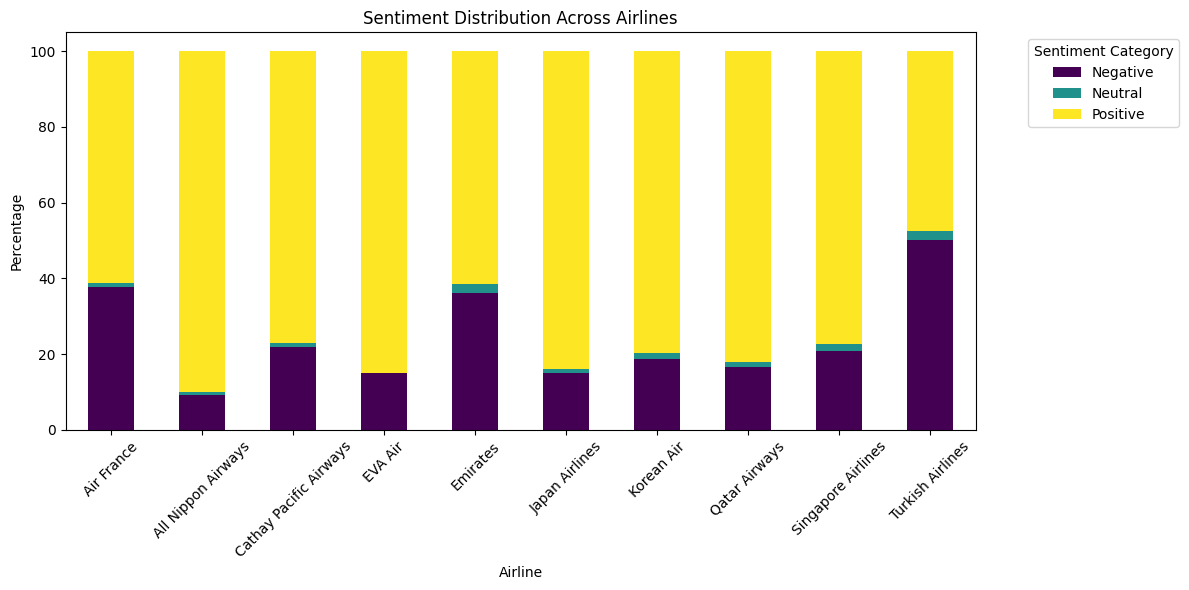

In [96]:
import seaborn as sns

# Count sentiment categories for each airline
sentiment_counts = df.groupby(['Airline', 'sentiment_category']).size().unstack(fill_value=0)

# Calculate percentage breakdown for each sentiment category
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Plot the comparison
plt.figure(figsize=(14, 8))
sentiment_percentages.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Sentiment Distribution Across Airlines")
plt.ylabel("Percentage")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.legend(title="Sentiment Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [97]:
# Save processed data to a CSV file
df.to_csv('processed_reviews.csv', index=False)


In [98]:
from google.colab import files
files.download('processed_reviews.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>